In [2]:
!pip install pandas numpy scikit-learn nltk matplotlib seaborn
!pip install wordcloud
!pip install powerbiclient


     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     --------------------------------------- 3.4/317.3 MB 20.2 MB/s eta 0:00:16
     - ------------------------------------- 9.2/317.3 MB 23.8 MB/s eta 0:00:13
     - ------------------------------------ 16.5/317.3 MB 28.1 MB/s eta 0:00:11
     -- ----------------------------------- 24.1/317.3 MB 29.9 MB/s eta 0:00:10
     --- ---------------------------------- 31.2/317.3 MB 30.9 MB/s eta 0:00:10
     ---- --------------------------------- 36.7/317.3 MB 31.5 MB/s eta 0:00:09
     ----- -------------------------------- 43.0/317.3 MB 30.0 MB/s eta 0:00:10
     ----- -------------------------------- 47.2/317.3 MB 28.9 MB/s eta 0:00:10
     ------ ------------------------------- 54.3/317.3 MB 29.3 MB/s eta 0:00:09
     ------- ------------------------------ 61.9/317.3 MB 30.1 MB/s eta 0:00:09
     -------- ----------------------------- 70.0/317.3 MB 31.0 MB/s eta 0:00:08
     --------- ---------------------------- 77.

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [6]:
# Downloading NLTK data
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rnarute\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rnarute\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# Load the dataset from the CSV file (replace with your actual file path)
df = pd.read_csv('Tweets.csv')

# Display the first few rows to understand the structure of the data
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean the tweet text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Lemmatize and remove stopwords
    return text

# Clean the tweet texts
df['cleaned_text'] = df['text'].apply(clean_text)

# Remove unnecessary columns
df_cleaned = df[['airline', 'airline_sentiment', 'cleaned_text']] 

# Display the cleaned data
print(df_cleaned[['airline_sentiment', 'cleaned_text']].head())


  airline_sentiment                                       cleaned_text
0           neutral                        virginamerica dhepburn said
1          positive  virginamerica plus youve added commercial expe...
2           neutral  virginamerica didnt today must mean need take ...
3          negative  virginamerica really aggressive blast obnoxiou...
4          negative                 virginamerica really big bad thing


In [10]:
# Check the columns in the dataset
print(df.columns)



Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'cleaned_text'],
      dtype='object')


In [12]:
# Label Encoding: Convert sentiments into numerical values
df_cleaned['sentiment_label'] = df_cleaned['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Display the cleaned data with sentiment labels
df_cleaned[['airline_sentiment', 'sentiment_label', 'cleaned_text']].head()


C:\Users\rnarute\AppData\Local\Temp\ipykernel_5688\2987641650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentiment_label'] = df_cleaned['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})


,airline_sentiment,sentiment_label,cleaned_text
0,neutral,1,virginamerica dhepburn said
1,positive,2,virginamerica plus youve added commercial expe...
2,neutral,1,virginamerica didnt today must mean need take ...
3,negative,0,virginamerica really aggressive blast obnoxiou...
4,negative,0,virginamerica really big bad thing


In [13]:
# Split data into train and test sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['cleaned_text'], df_cleaned['sentiment_label'], test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (11712,), Test set: (2928,)


In [14]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data, and transform the test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Display the shape of the transformed data
print(f"Training set (TF-IDF): {X_train_tfidf.shape}, Test set (TF-IDF): {X_test_tfidf.shape}")


Training set (TF-IDF): (11712, 5000), Test set (TF-IDF): (2928, 5000)


In [15]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.8019125683060109
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1889
           1       0.68      0.49      0.57       580
           2       0.80      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.72      2928
weighted avg       0.79      0.80      0.79      2928



C:\Users\rnarute\AppData\Local\Temp\ipykernel_5688\398007864.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='Set2')
C:\Users\rnarute\AppData\Local\Temp\ipykernel_5688\398007864.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='Set2')


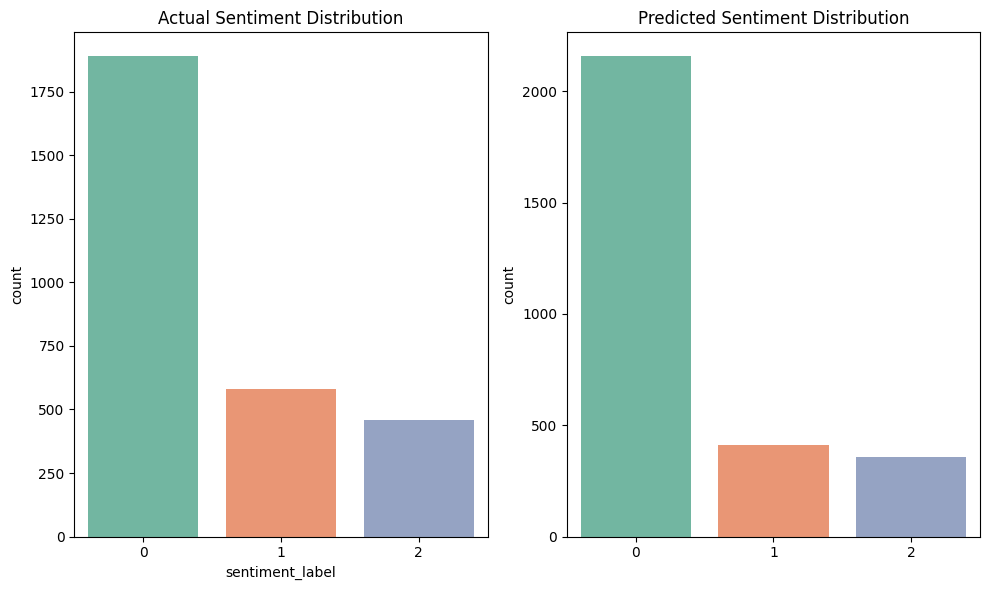

In [16]:
# Visualize the distribution of actual and predicted sentiments
plt.figure(figsize=(10, 6))

# Actual sentiment distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_test, palette='Set2')
plt.title('Actual Sentiment Distribution')

# Predicted sentiment distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_pred, palette='Set2')
plt.title('Predicted Sentiment Distribution')

plt.tight_layout()
plt.show()


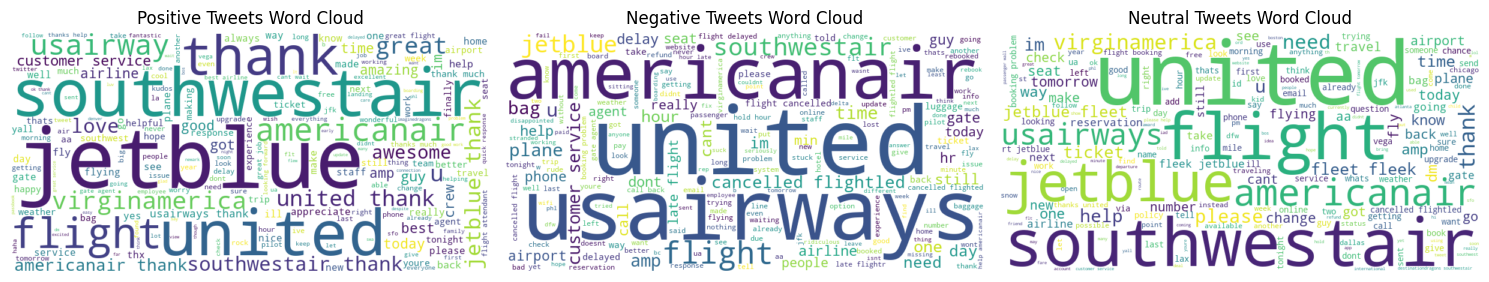

In [21]:
# Combine all tweets based on sentiment labels
positive_tweets = ' '.join(df_cleaned[df_cleaned['sentiment_label'] == 2]['cleaned_text'])
negative_tweets = ' '.join(df_cleaned[df_cleaned['sentiment_label'] == 0]['cleaned_text'])
neutral_tweets = ' '.join(df_cleaned[df_cleaned['sentiment_label'] == 1]['cleaned_text'])

# Create word clouds for each sentiment
plt.figure(figsize=(15, 10))

# Positive Word Cloud
plt.subplot(1, 3, 1)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis('off')

# Negative Word Cloud
plt.subplot(1, 3, 2)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis('off')

# Neutral Word Cloud
plt.subplot(1, 3, 3)
wordcloud_neu = WordCloud(width=800, height=400, background_color='white').generate(neutral_tweets)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.title('Neutral Tweets Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()


In [18]:
df_results = pd.DataFrame({'tweet_text': X_test, 'actual_sentiment': y_test, 'predicted_sentiment': y_pred})
df_results.to_csv('sentiment_analysis_results.csv', index=False)


In [19]:
df_results.to_csv('sentiment_analysis_results_cleaned.csv', index=False, encoding='utf-8')
